<p style="color:white;font-size:160px;padding:100px;background-color:#000C3C;border-radius:15px;text-align:center"> Superstore

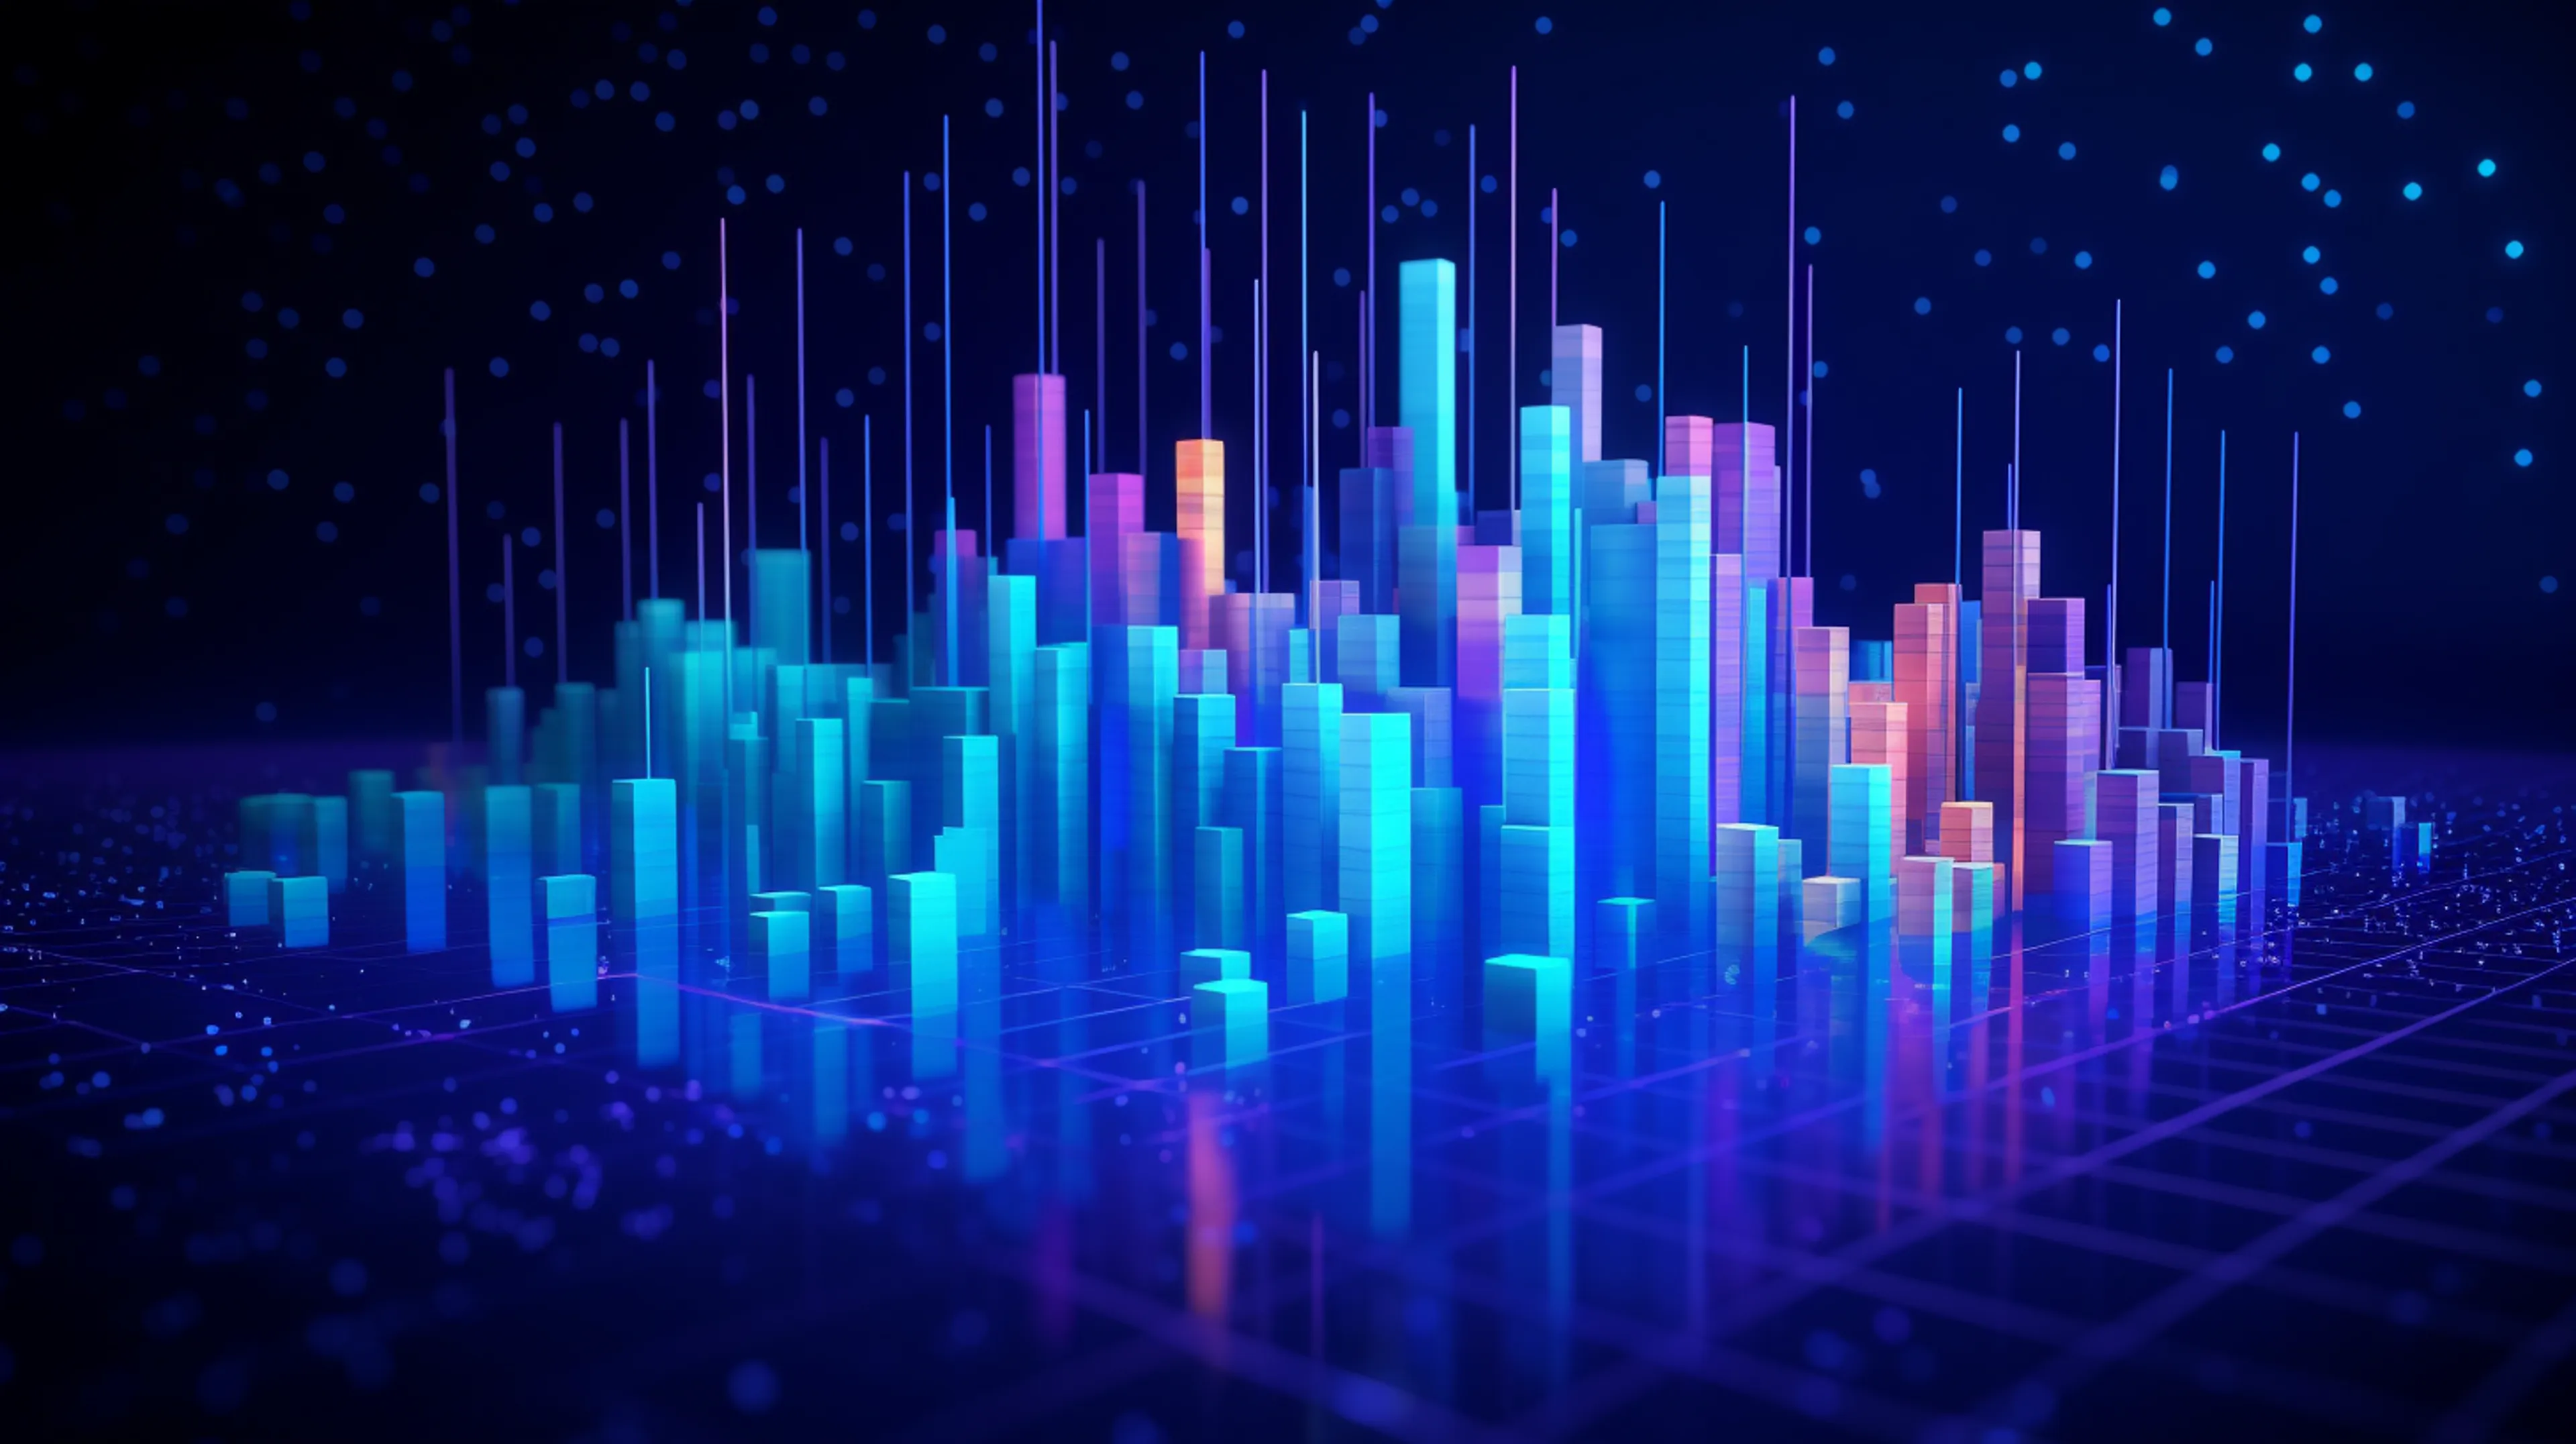

<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center"> 1- Problem Defination and understanding 

<p style="color:black;font-size:25px;padding:5px;line-height:40px;font-weight:bolder"> With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking our knowledge in understanding what works best for them.<span style="color:green;font-size:25px;padding:5px;line-height:40px;font-weight:bolder">They would like to understand which products, regions, categories and customer segments they should target or avoid.

<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center"> 2- Meta Data

- **Row ID**: Unique ID for each row.
- **Order ID**: Unique Order ID for each Customer.
- **Order Date**: Order Date of the product.
- **Ship Date**: Shipping Date of the Product.
- **Ship Mode**: Shipping Mode specified by the Customer.
- **Customer ID**: Unique ID to identify each Customer.
- **Customer Name**: Name of the Customer.
- **Segment**: The segment where the Customer belongs.
- **Country**: Country of residence of the Customer.
- **City**: City of residence of the Customer.
- **State**: State of residence of the Customer.
- **Postal Code**: Postal Code of every Customer.
- **Region**: Region where the Customer belongs.
- **Product ID**: Unique ID of the Product.
- **Category**: Category of the product ordered.
- **Sub-Category**: Sub-Category of the product ordered.
- **Product Name**: Name of the Product.
- **Sales**: Sales of the Product.
- **Quantity**: Quantity of the Product.
- **Discount**: Discount provided.
- **Profit**: Profit/Loss incurred.

<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center"> 3- Questions need to answer

1. **What is the trend direction of our profits over the years?**
2. **What is the best ship mode we depend on?**
3. **Who are the top 10 customers with the Most Profit?**
4. **Which products in our Superstore are the best-sellers and most profitable?**
5. **What is the city that has the highest performance in terms of sales and profit?**
6. **What is the top-performing state in our sales and profit data?**
7. **Which customer segment demonstrates the highest profitability in our Superstore?**
8. **Which region shows the highest profitability and best-selling products?**
9. **What product category has yielded the highest profits?**
10. **Among our sub-categories, which one stands out as the most profitable and in highest demand?**
11. **How do discounts and promotional activities influence our sales performance?**
12. **What is the average profit margin associated with each product category?**

<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center"> 4- Data wrangling

In [1]:
# Import the most important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the dataset
Superstore = pd.read_csv(r"Sample-Superstore.csv",encoding="ISO-8859-1")

In [3]:
# Inspect sample of the data
pd.set_option('display.max_columns', None)
Superstore.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5480,5481,CA-2017-105487,10/8/2017,10/14/2017,Standard Class,CS-12250,Chris Selesnick,Corporate,United States,San Diego,California,92105,West,TEC-PH-10001336,Technology,Phones,Digium D40 VoIP phone,103.192,1,0.2,11.6091
527,528,CA-2017-113558,10/21/2017,10/26/2017,Standard Class,PH-18790,Patricia Hirasaki,Home Office,United States,Lakeland,Florida,33801,South,FUR-FU-10001756,Furniture,Furnishings,"Eldon Expressions Desk Accessory, Wood Photo F...",45.696,3,0.2,5.1408
523,524,US-2016-139486,5/21/2016,5/23/2016,First Class,LH-17155,Logan Haushalter,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10003555,Technology,Phones,Motorola HK250 Universal Bluetooth Headset,55.176,3,0.2,-12.4146


In [4]:
# Check the info about columns 
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Check for nulls values
Superstore.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Show summary statistics about the dataset
Superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# check for the duplicates in rows
Superstore.duplicated().sum()

0

# Data has been cleaned and is now ready for analysis.
- 1 - No duplicates in the dataset.
- 2 - No missing values (nulls) found.
- 3 - Data types have been correctly formatted.

In [8]:
# show the data columns
Superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
# Install the tabulate library if you haven't already
# !pip install tabulate

from tabulate import tabulate

# Select specific categorical features
categorical_features = Superstore[["Ship Mode", 'Segment', 'Country', 'Region', 'Category']]

# Create a dictionary to store unique values for each feature
unique_values_dict = {}

for feature in categorical_features.columns:
    unique_values_dict[feature] = categorical_features[feature].unique()

# Display unique values in a tall and thin tabular format
for feature, unique_values in unique_values_dict.items():
    data = [[value] for value in unique_values]
    table = tabulate(data, tablefmt='grid')
    print(f"Unique values for {feature}:\n{table}\n")

Unique values for Ship Mode:
+----------------+
| Second Class   |
+----------------+
| Standard Class |
+----------------+
| First Class    |
+----------------+
| Same Day       |
+----------------+

Unique values for Segment:
+-------------+
| Consumer    |
+-------------+
| Corporate   |
+-------------+
| Home Office |
+-------------+

Unique values for Country:
+---------------+
| United States |
+---------------+

Unique values for Region:
+---------+
| South   |
+---------+
| West    |
+---------+
| Central |
+---------+
| East    |
+---------+

Unique values for Category:
+-----------------+
| Furniture       |
+-----------------+
| Office Supplies |
+-----------------+
| Technology      |
+-----------------+



In [10]:
# Select specific categorical features
categorical_features = Superstore[["Ship Mode", 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']]

# Create a DataFrame to store the number of unique values
unique_values_count_df = pd.DataFrame(columns=["Categorical Feature", "Number of Unique Values"])

for feature in categorical_features.columns:
    num_unique_values = categorical_features[feature].nunique()
    unique_values_count_df = unique_values_count_df.append({"Categorical Feature": feature, "Number of Unique Values": num_unique_values}, ignore_index=True)

# Display the DataFrame with the number of unique values
unique_values_count_df

,Categorical Feature,Number of Unique Values
0,Ship Mode,4
1,Segment,3
2,Country,1
3,City,531
4,State,49
5,Region,4
6,Category,3
7,Sub-Category,17


In [11]:
# Total order ordered in total 1237 day
Superstore["Order Date"].nunique()

1237

In [12]:
# Total order shiped in total 1334 day
Superstore["Ship Date"].nunique()

1334

<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center"> 5- Exploratory data analysis (EDA) 

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 1) What is the trend direction of our profits over the years?

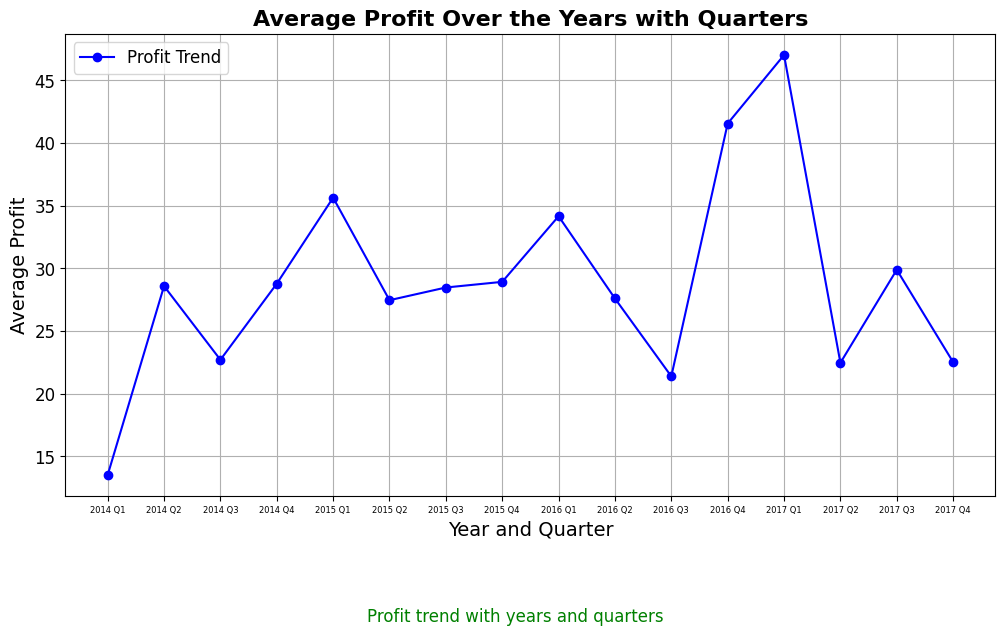

In [21]:
# Convert the "Order Date" column to a datetime format
Superstore['Order Date'] = pd.to_datetime(Superstore['Order Date'])

# Extract the year and quarter from the "Order Date" column
Superstore['Year'] = Superstore['Order Date'].dt.year
Superstore['Quarter'] = Superstore['Order Date'].dt.quarter

# Group the data by year and quarter and calculate the mean profit for each period
profit_over_years_quarters = Superstore.groupby(['Year', 'Quarter'])['Profit'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
x_values = [f"{year} Q{quarter}" for year, quarter in profit_over_years_quarters.index]
y_values = profit_over_years_quarters.values

plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Profit Trend')
plt.title('Average Profit Over the Years with Quarters', fontsize=16, fontweight='bold')
plt.xlabel('Year and Quarter', fontsize=14)
plt.ylabel('Average Profit', fontsize=14)
plt.grid(True)

# Set custom ticks on the x-axis (show all values)
plt.xticks(x_values, fontsize=6, rotation=0)

# Style the legend
plt.legend(loc='upper left', fontsize=12)

# Customize the y-axis ticks
plt.yticks(fontsize=12)

# Add a text comment directly below the graph
plt.figtext(0.5, -0.1, 'Profit trend with years and quarters', fontsize=12, color='green', ha='center')

plt.show()

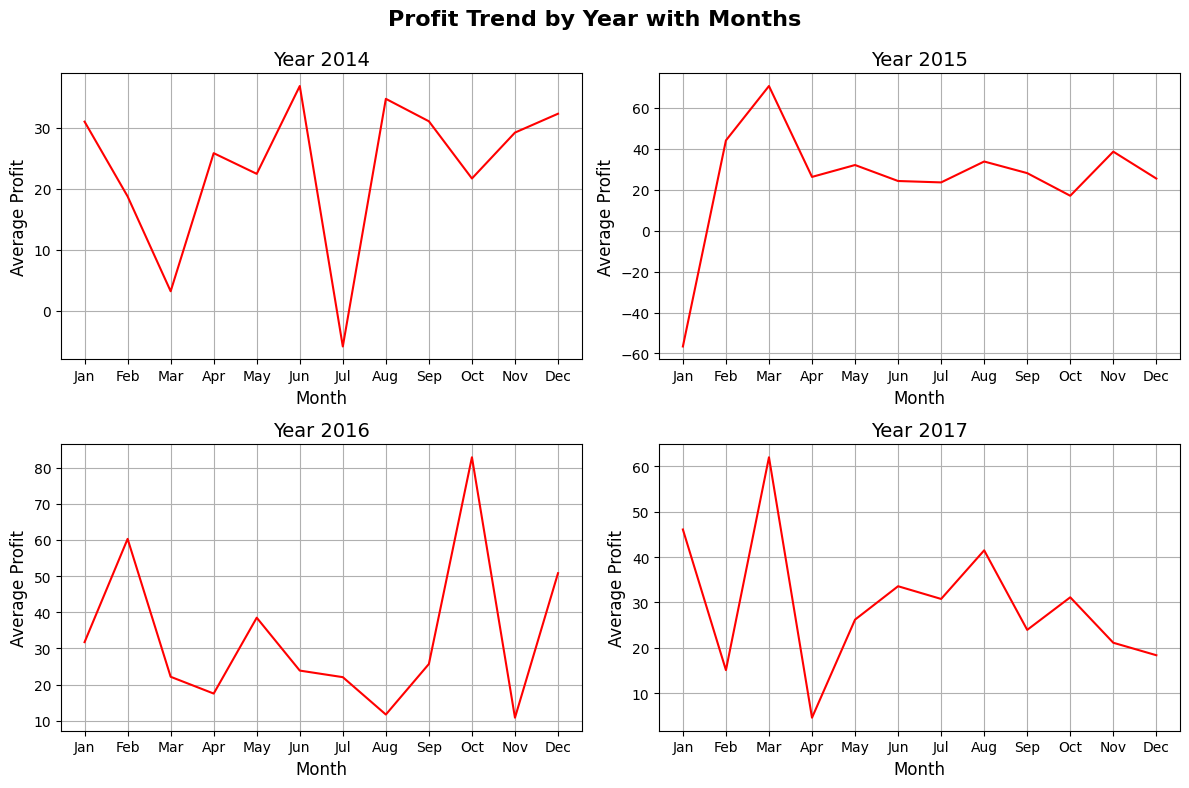

In [30]:
# Filter the data for the years 2014 to 2017
years = [2014, 2015, 2016, 2017]
data_by_year = [Superstore[Superstore['Year'] == year] for year in years]

# Add a "Month" column if it doesn't already exist
for i in range(len(data_by_year)):
    if 'Month' not in data_by_year[i].columns:
        data_by_year[i]['Month'] = data_by_year[i]['Order Date'].dt.month

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Profit Trend by Year with Months', fontsize=16, fontweight='bold')

for i, year_data in enumerate(data_by_year):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Group the data by month and calculate the mean profit for each month
    profit_by_month = year_data.groupby('Month')['Profit'].mean()

    ax.plot(profit_by_month.index, profit_by_month.values, linestyle='-', color='r')
    ax.set_title(f'Year {years[i]}', fontsize=14)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Average Profit', fontsize=12)
    ax.grid(True)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.tick_params(axis='both', labelsize=10)

# Adjust the layout of the subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 2) What is the best ship mode we depend on?

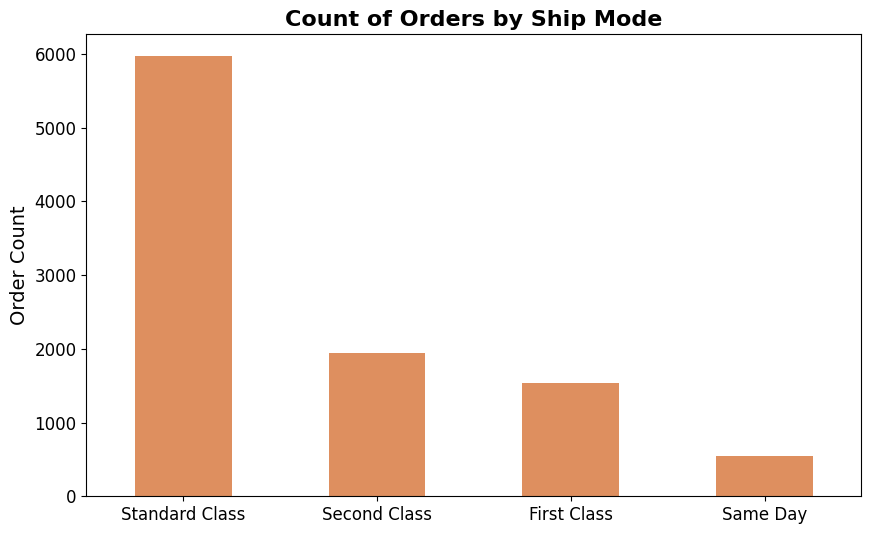

In [42]:
# Calculate the count of orders for each ship mode
ship_mode_counts = Superstore['Ship Mode'].value_counts()

# Set custom color palette

# Plot a bar chart to visualize the counts
plt.figure(figsize=(10, 6))
ship_mode_counts.plot(kind='bar', color="#DE8F5F")
plt.title('Count of Orders by Ship Mode', fontsize=16, fontweight='bold')
plt.xlabel('Ship Mode', fontsize=14)
plt.ylabel('Order Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis labels for better readability

# Customize the y-axis ticks
plt.yticks(fontsize=12)

# Remove the x-axis label (it's already in the title)
plt.xlabel('')

plt.show()

<span style="color:green;font-size:20px;padding:5px;line-height:30px;font-weight:thin"> It appears that "Standard Class" is the ship mode with the maximum number of orders. This information is valuable for understanding the most common shipping method used in your Superstore

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 3) Who are the top 5 customers with the Most Profit?

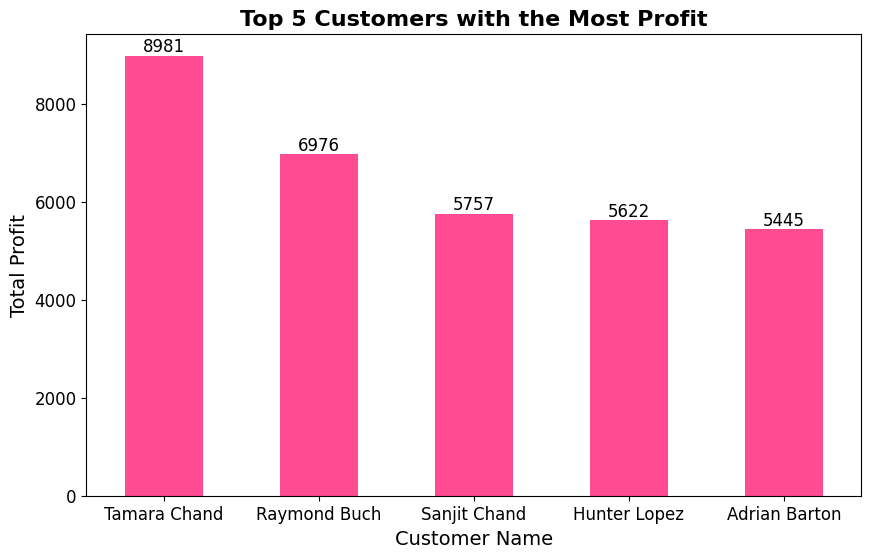

In [44]:
# Group the data by 'Customer Name' and calculate the sum of profit for each customer
top_profit_customers = Superstore.groupby('Customer Name')['Profit'].sum().nlargest(5).round()

# Plot a bar chart with different colors and add light grid lines
plt.figure(figsize=(10, 6))
ax = top_profit_customers.plot(kind='bar', color="#FF4B91")
plt.title('Top 5 Customers with the Most Profit', fontsize=16, fontweight='bold')
plt.xlabel('Customer Name', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Customize the y-axis ticks
plt.yticks(fontsize=12)

# Annotate the counts on top of the bars (hide the dots in annotated numbers)
for i, v in enumerate(top_profit_customers):
    ax.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=12, label='_nolegend_')

# Style the labels
plt.xlabel('Customer Name', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)

# Add a title
plt.title('Top 5 Customers with the Most Profit', fontsize=16, fontweight='bold')

plt.show()


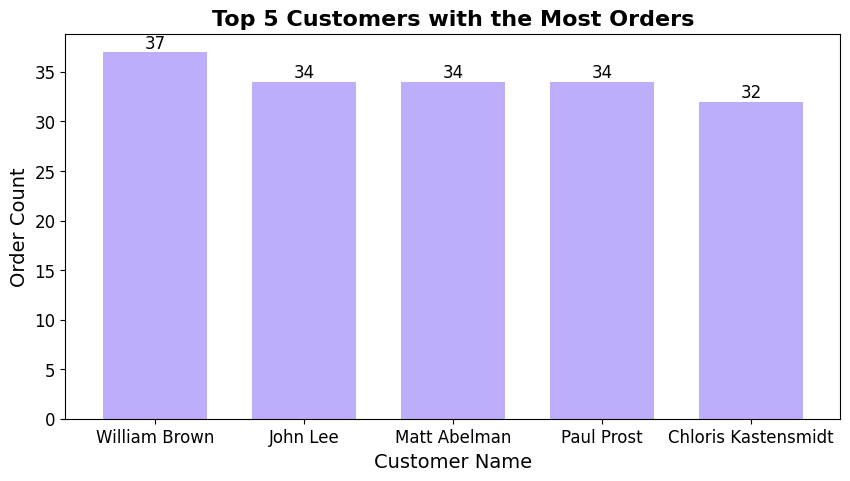

In [46]:
# Calculate the count of orders for each customer and select the top 5
top_customers = Superstore['Customer Name'].value_counts().head(5)

# Plot a bar chart to visualize the order count for the top 5 customers
plt.figure(figsize=(10, 5))
ax = top_customers.plot(kind='bar', color='#BEADFA',width=0.7)
plt.title('Top 5 Customers with the Most Orders', fontsize=16, fontweight='bold')
plt.xlabel('Customer Name', fontsize=14)
plt.ylabel('Order Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Customize the y-axis ticks
plt.yticks(fontsize=12)

# Add annotations with numbers on the bars
for i, v in enumerate(top_customers):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 4) Which products in our Superstore are the best-sellers and most profitable?

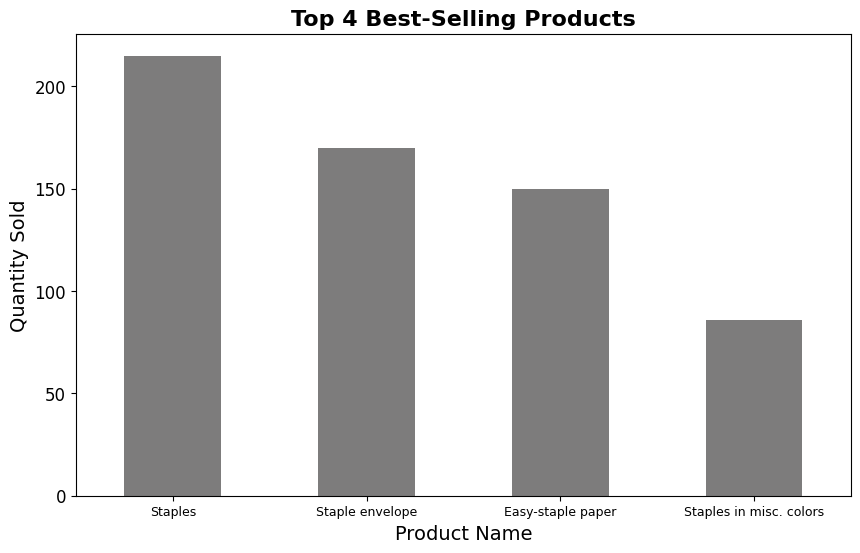

In [47]:
# Group the data by 'Product Name' and calculate the sum of quantity sold for each product
top_selling_products = Superstore.groupby('Product Name')['Quantity'].sum().nlargest(4)

# Plot a bar chart to visualize the top 4 best-selling products
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='#7D7C7C')
plt.title('Top 4 Best-Selling Products', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=0, fontsize=9)

# Customize the y-axis ticks
plt.yticks(fontsize=12)

plt.show()

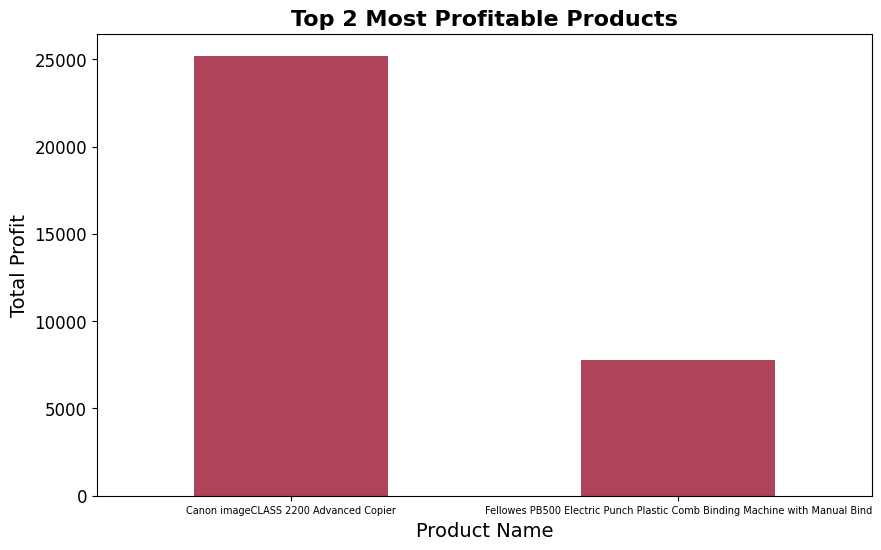

In [48]:
# Group the data by 'Product Name' and calculate the total profit for each product
top_profitable_products = Superstore.groupby('Product Name')['Profit'].sum().nlargest(2)

# Plot a bar chart to visualize the top 2 most profitable products
plt.figure(figsize=(10, 6))
top_profitable_products.plot(kind='bar', color='#AE445A')
plt.title('Top 2 Most Profitable Products', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=0, fontsize=7)

# Customize the y-axis ticks
plt.yticks(fontsize=12)

plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 5) What is the city that has the highest performance in terms of sales and profit?

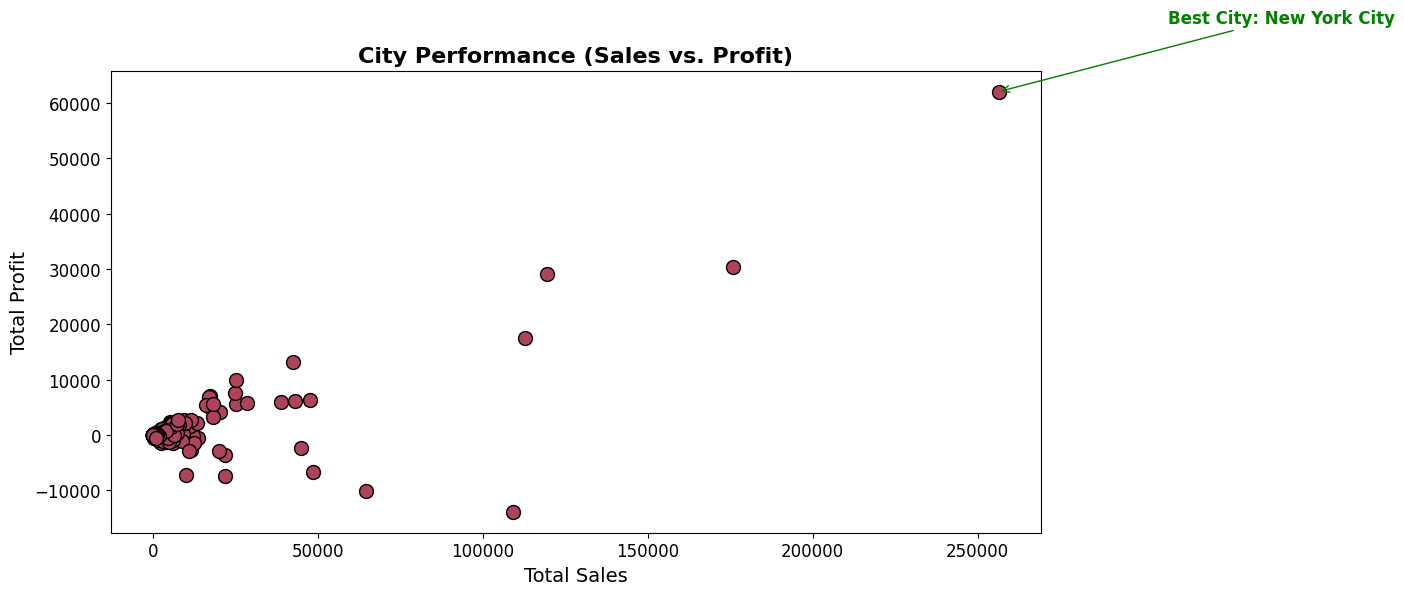

In [49]:
# Group the data by 'City' and calculate the sum of sales and profit for each city
city_performance = Superstore.groupby('City')[['Sales', 'Profit']].sum()

# Calculate the combined performance (sales + profit) for each city
city_performance['Combined Performance'] = city_performance['Sales'] + city_performance['Profit']

# Find the city with the highest combined performance
best_city = city_performance['Combined Performance'].idxmax()

# Create a scatter plot to visualize the relationship between sales and profit
plt.figure(figsize=(12, 6))
plt.scatter(city_performance['Sales'], city_performance['Profit'], c='#AE445A', s=100, edgecolors='k')
plt.title('City Performance (Sales vs. Profit)', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the city with the highest performance
plt.annotate(f"Best City: {best_city}", xy=(city_performance.loc[best_city, 'Sales'], city_performance.loc[best_city, 'Profit']),
             xytext=(city_performance.loc[best_city, 'Sales'] * 1.2, city_performance.loc[best_city, 'Profit'] * 1.2),
             fontsize=12, fontweight='bold', color='green',
             arrowprops=dict(arrowstyle='->', color='green'))

plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 6) What is the top-performing state in our sales and profit data?

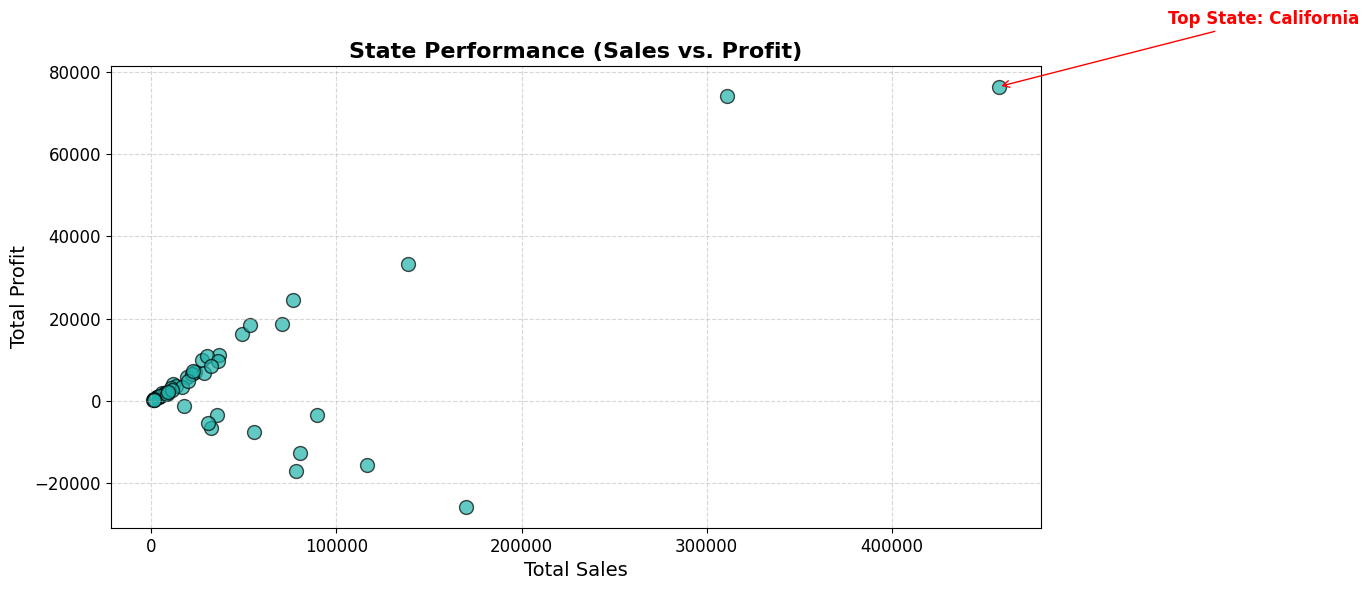

In [52]:
# Group the data by 'State' and calculate the sum of sales and profit for each state
state_performance = Superstore.groupby('State')[['Sales', 'Profit']].sum()

# Calculate the combined performance (sales + profit) for each state
state_performance['Combined Performance'] = state_performance['Sales'] + state_performance['Profit']

# Find the top-performing state with the highest combined performance
top_state = state_performance['Combined Performance'].idxmax()

# Create a scatter plot to visualize the relationship between sales and profit for each state
plt.figure(figsize=(12, 6))
plt.scatter(state_performance['Sales'], state_performance['Profit'], c='lightseagreen', s=100, edgecolors='k', alpha=0.7)
plt.title('State Performance (Sales vs. Profit)', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the top-performing state
plt.annotate(f"Top State: {top_state}", xy=(state_performance.loc[top_state, 'Sales'], state_performance.loc[top_state, 'Profit']),
             xytext=(state_performance.loc[top_state, 'Sales'] * 1.2, state_performance.loc[top_state, 'Profit'] * 1.2),
             fontsize=12, fontweight='bold', color='red',
             arrowprops=dict(arrowstyle='->', color='red'))

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 7) Which customer segment demonstrates the highest profitability in our Superstore?

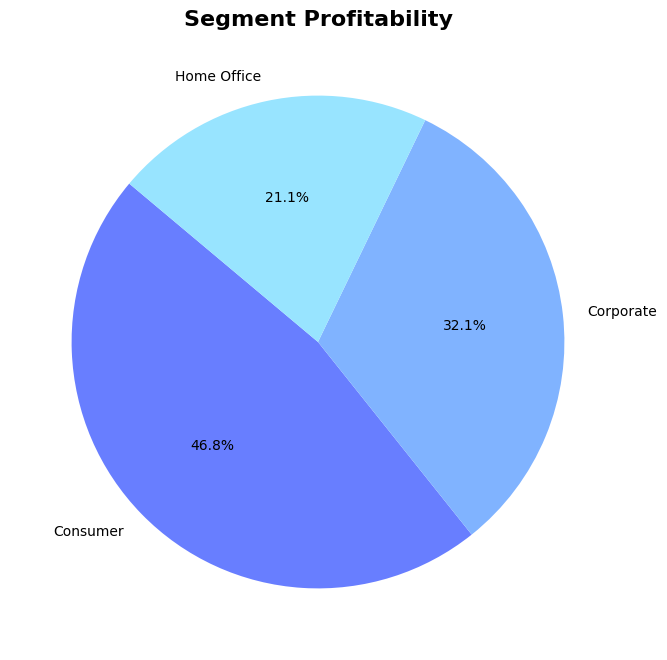

In [56]:
# Group the data by 'Segment' and calculate the sum of profit for each segment
segment_profitability = Superstore.groupby('Segment')['Profit'].sum()

# Create a pie chart to visualize the profitability of each customer segment
plt.figure(figsize=(8, 8))
plt.pie(segment_profitability, labels=segment_profitability.index, autopct='%1.1f%%', startangle=140, colors=['#687EFF', '#80B3FF', '#98E4FF'])
plt.title('Segment Profitability', fontsize=16, fontweight='bold')

plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 8) Which region shows the highest profitability and best-selling products?

<Figure size 1200x600 with 0 Axes>

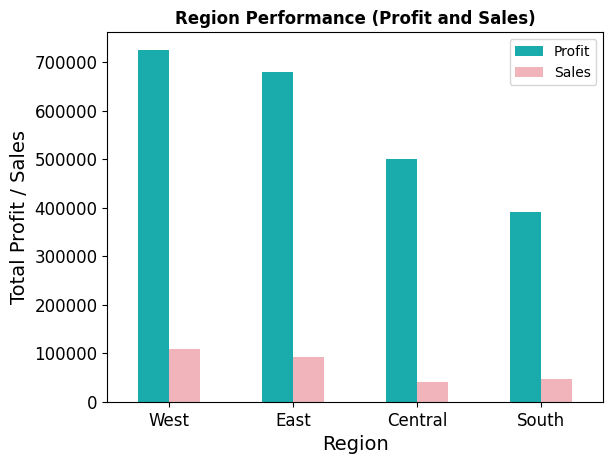

In [65]:
# Group the data by 'Region' and calculate the sum of profit and sales for each region
region_performance = Superstore.groupby('Region')[['Sales','Profit']].sum()

# Sort the regions by profit in descending order
region_performance = region_performance.sort_values(by='Sales', ascending=False)

# Plot a bar chart to visualize the profitability and best-selling products by region
plt.figure(figsize=(12, 6))
region_performance[['Sales','Profit']].plot(kind='bar', color=['#1AACAC', '#F1B4BB'])
plt.title('Region Performance (Profit and Sales)', fontsize=12, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Profit / Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(["Profit", "Sales"])

# Customize the y-axis ticks
plt.yticks(fontsize=12)

plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 9) What product category has yielded the highest profits?

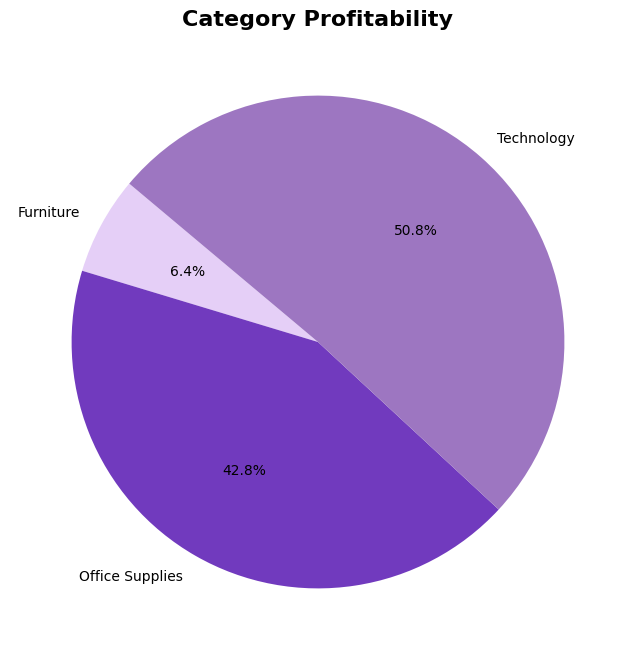

In [71]:
# Group the data by 'Category' and calculate the sum of profit for each category
category_profitability = Superstore.groupby('Category')['Profit'].sum()

# Define custom colors
colors = ['#E5CFF7', '#713ABE', '#9D76C1']  # You can customize these colors

# Create a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(category_profitability, labels=category_profitability.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Category Profitability', fontsize=16, fontweight='bold')

plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 10) Among our sub-categories, which one stands out as the most profitable and in highest demand?

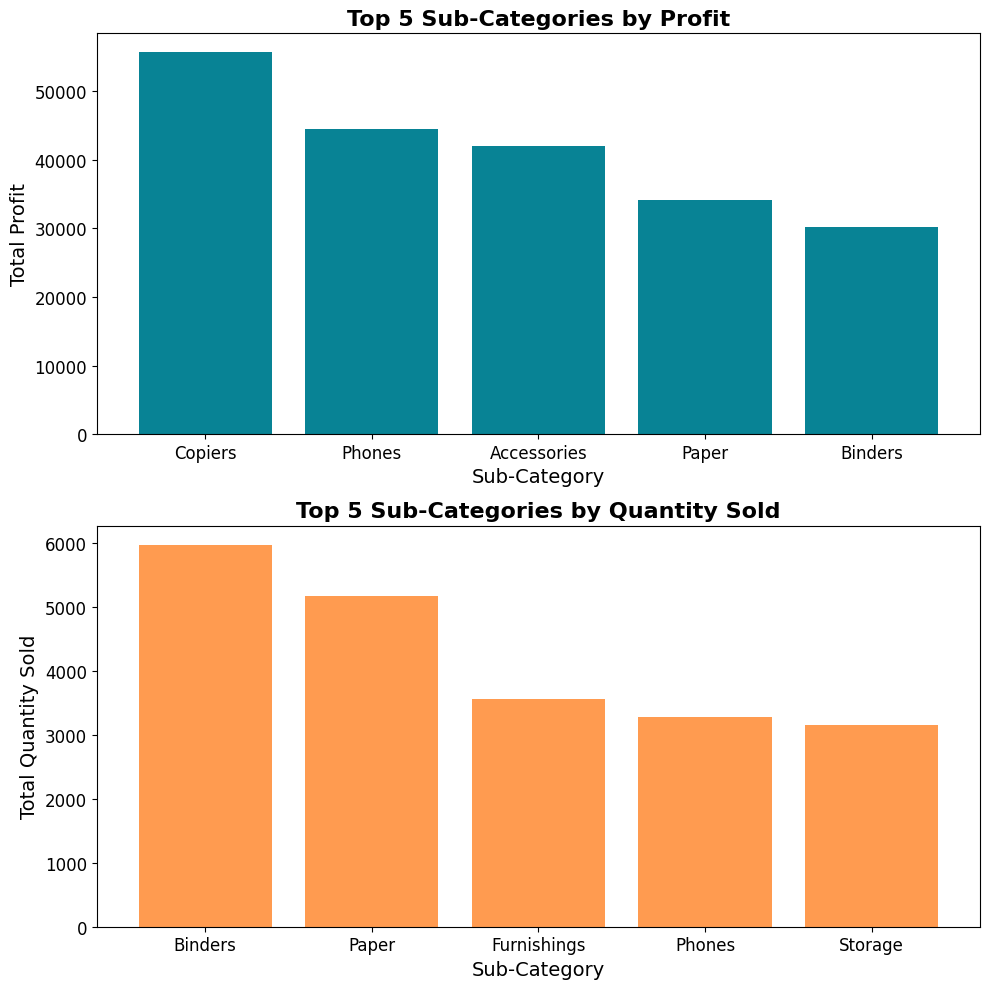

In [77]:
# Group the data by 'Sub-Category' and calculate the sum of profit and quantity sold for each sub-category
subcat_performance = Superstore.groupby('Sub-Category')[['Profit', 'Quantity']].sum()

# Sort the sub-categories by profit and quantity in descending order
subcat_profit = subcat_performance.sort_values(by='Profit', ascending=False).head(5)
subcat_quantity = subcat_performance.sort_values(by='Quantity', ascending=False).head(5)

# Create a bar chart for profitability
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)  # Create a subplot for the first graph (top position)
subcat_profit['Profit'].plot(kind='bar', color='#088395',width=0.8)
plt.title('Top 5 Sub-Categories by Profit', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Create a bar chart for quantity sold
plt.subplot(2, 1, 2)  # Create a subplot for the second graph (bottom position)
subcat_quantity['Quantity'].plot(kind='bar', color='#FF9B50',width=0.8)
plt.title('Top 5 Sub-Categories by Quantity Sold', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  # Adjust the layout for better visualization
plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 11) How do discounts and promotional activities influence our sales performance?

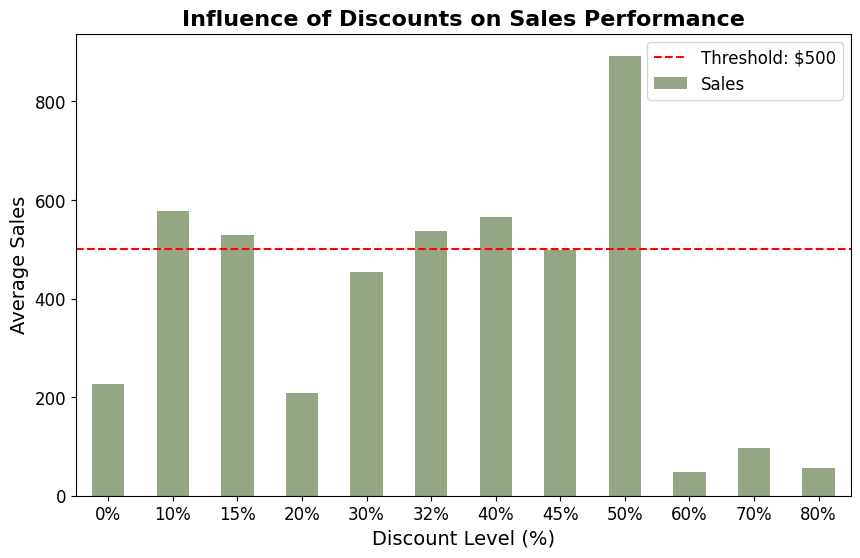

In [83]:
# Group the data by 'Discount' and calculate the average sales for each discount level
discount_sales = Superstore.groupby('Discount')['Sales'].mean()

# Create a bar chart to visualize the influence of discounts on sales
plt.figure(figsize=(10, 6))
discount_sales.plot(kind='bar', color='#94A684', width=0.5)  # Adjust the width as needed
plt.title('Influence of Discounts on Sales Performance', fontsize=16, fontweight='bold')
plt.xlabel('Discount Level (%)', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add percentage sign (%) to the x-axis labels
plt.gca().set_xticklabels(['{:.0f}%'.format(d * 100) for d in discount_sales.index])

# Add a horizontal line at a specific value (e.g., an average sales threshold)
average_sales_threshold = 500  # Adjust this value as needed
plt.axhline(average_sales_threshold, color='red', linestyle='--', label='Threshold: $500')

# Add a legend
plt.legend(fontsize=12)

plt.show()

<p style="color:k;font-size:20px;padding:15px;background-color:#F1D4E5;border-radius:15px;text-align:left"> 12) What is the average profit margin associated with each product category?

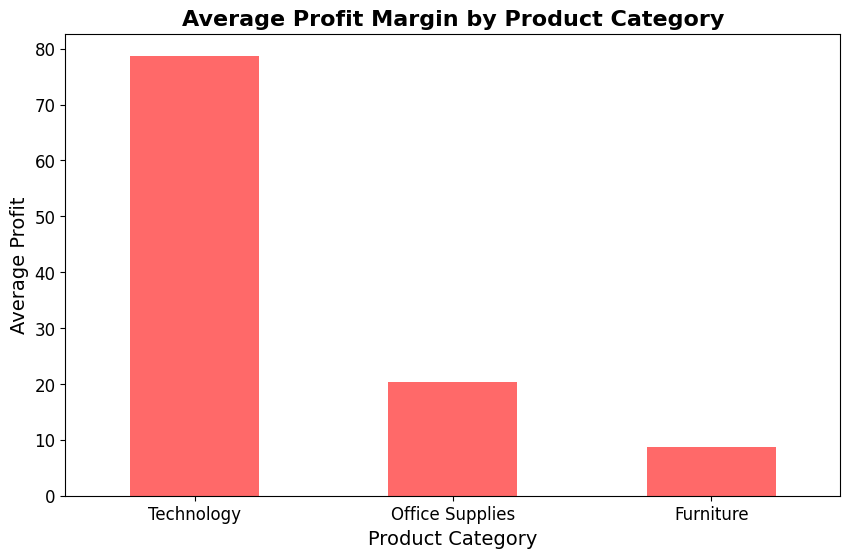

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called Superstore

# Calculate the average profit margin for each product category
avg_profit_margin = Superstore.groupby('Category')['Profit'].mean().sort_values(ascending=False)

# Create a bar chart to visualize the average profit margin by product category
plt.figure(figsize=(10, 6))
avg_profit_margin.plot(kind='bar', color='#FF6969')
plt.title('Average Profit Margin by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Profit', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


<p style="color:white;font-size:40px;padding:25px;background-color:#000C3C;border-radius:15px;text-align:center"> 6) New section 